In [3]:
import pandas as pd

In [29]:
df=pd.read_csv('/Users/manbirsingh/Downloads/28thmay/airfoil_self_noise.dat',sep="\t",header=None)

In [6]:
This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

SyntaxError: invalid syntax (3560649745.py, line 1)

In [30]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [9]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [10]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [31]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [32]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
### first Do train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [24]:
X_train.head()

,0,1,2,3,4
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


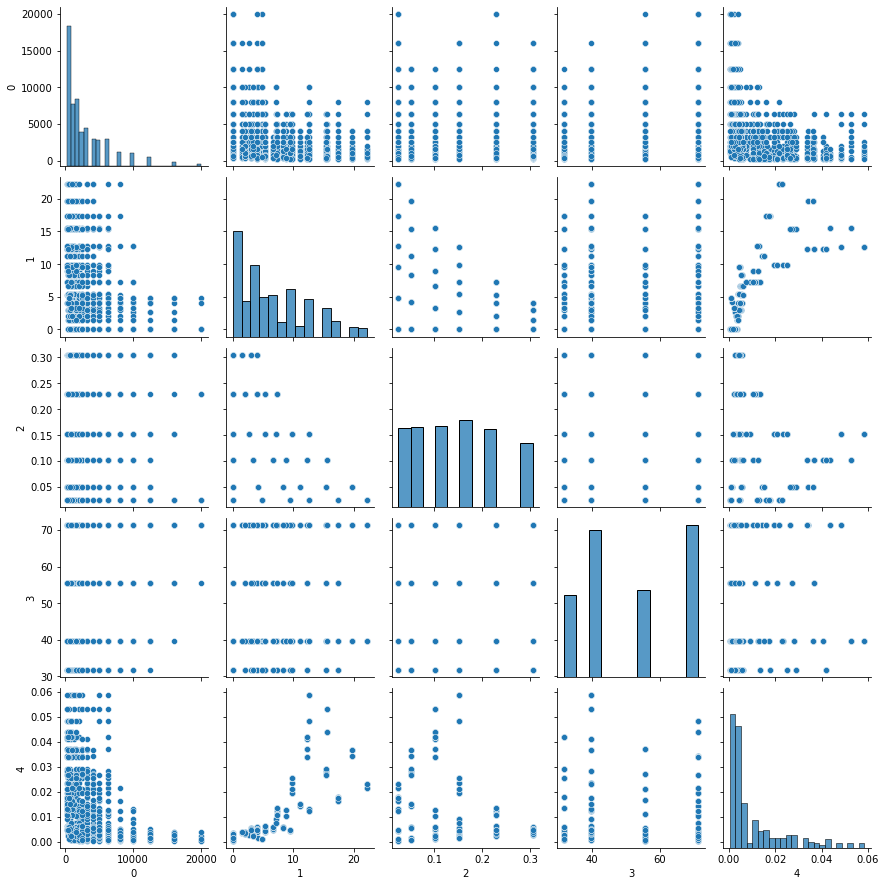

In [34]:
import seaborn as sns
sns.pairplot(X_train)

In [35]:
import matplotlib.pyplot as plt
X_train.corr()

,0,1,2,3,4
0,1.000000,-0.273327,-0.000324,0.125247,-0.239878
1,-0.273327,1.000000,-0.498257,0.058603,0.762567
2,-0.000324,-0.498257,1.000000,0.013061,-0.220849
3,0.125247,0.058603,0.013061,1.000000,-0.000519
4,-0.239878,0.762567,-0.220849,-0.000519,1.000000


In [36]:
sns.boxplot(X_train['Frequency'])

KeyError: 'Frequency'

In [37]:
sns.scatterplot(X_train['Frequency'],y)

KeyError: 'Frequency'

In [38]:
len(df['pressure level'].unique())

KeyError: 'pressure level'

In [39]:
sns.boxplot(df['pressure level'])

KeyError: 'pressure level'

In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [48]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [49]:
!pip install flask

In [47]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37